# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [352]:
import requests
import requests_cache
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import time

requests_cache.install_cache("mycache")

In [30]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [31]:
key = read_key("C:/Users/dthed/Downloads/Keys/data_gov.txt")

In [217]:
def ndb_search(query):
    """
    Searches for 'query' in the USDA's Food Composition Database. An API key is required to
    use the API. Returns a list of entries that match 'query', or an empty list if no
    matches are found.
    """
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key": key,
        "q": query
    })

    response.raise_for_status()
    response = response.json()
    if "errors" in response:
        return []
    else:
        return response["list"]["item"]

In [218]:
ndb_search("quail eggs")

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

In [219]:
ndb_search("fdsklfds")

[]

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [220]:
fresh_complete = pd.read_csv("fresh.csv")

fresh_complete

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit


In [222]:
def narrow_search(food, form, kind, source = 'SR', manu = 'none', exclude = ''):
    """
    Helper function for Exercise 1.2. Returns a pandas DataFrame of results from a ndb_search
    with more specific parameters to identify the desired NDB Numbers for each raw food.
    
    Inputs: food name, form (e.g., peeled or with peel), kind (e.g., fruit or veggie), data
            source (defaults to Standard Reference -- 'SR'), manufacturer (defaults to 'none'),
            search terms to exclude (defaults to nothing, can be a string or a regex).
    """
    search_term = "raw " + food + " " + form # all desired foods are raw
    
    result = ndb_search(search_term)
    
    # Certain fruits (i.e., kiwi) are not found unless we add the word "fruit" to the food name
    if not result and kind == 'fruit':
        result = ndb_search("raw " + food + kind + " " + form)
    
    result_df = pd.DataFrame(result)
    
    crit1 = result_df["ds"] == source # filter results by database
    crit2 = result_df["manu"] == manu # filter results by manufacturer
    crit3 = result_df["group"] == "Fruits and Fruit Juices" # filter results to only include fruits
    
    # If the food is a fruit, filter by above criteria. Otherwise, add veggies to the filter.
    # Certain foods that are labeled as vegetables (e.g., avocados) have seeds and are
    # therefore considered fruits in the USDA Food Database.
    if kind == "fruit":
        all_crit = crit1 & crit2 & crit3
    else:
        crit4 = result_df["group"] == "Vegetables and Vegetable Products"
        all_crit = crit1 & crit2 & (crit3 | crit4)
    
    # filter results to exclude specified terms
    if exclude:
        crit5 = ~result_df["name"].str.contains(exclude, case = False)
        all_crit = all_crit & crit5
    
    # Apply the filter criteria to limit undesired results
    result_df = result_df[all_crit]
    
    return result_df

In [223]:
fresh = fresh_complete[["form", "food", "type"]] # Extract only the necessary columns from fresh_complete
ndbno = [] # store the NDBNO's in a list

for x in range(len(fresh)):
    row = fresh.iloc[x,:] # deal with one row at a time
    
    food = row["food"].replace("_", " ") # replace underscores with spaces in food names
    
    # Remove '1' from end of form, 'Fresh' from beginning of form, delete some unnecessary words
    form = row["form"].rstrip('1').lstrip("Fresh,").replace("consumed", "").replace("cabbage", "").strip()
    kind = row["type"]
    
    # Perform search, excluding results that contain hyphens, 'juice', 'acerola', 'muscadine', or 'scallop'.
    results = narrow_search(food, form, kind, exclude = "juice|-|acerola|muscadine|scallop")
    
    if results.empty:
        # NO RESULTS:
        nbdno.append("*****")
    else:
        # Add each NDBNO to list (preserving order)
        ndbno.append(results.iloc[0,:]["ndbno"])

    time.sleep(0.1)

# print(ndbno)

In [287]:
fresh_complete["ndbno"] = ndbno # add the NDBNO's as a new column in the fresh_complete DataFrame

fresh_complete

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [211]:
def ndb_report(ndbno):
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key": key,
        "ndbno": [ndbno]
    })

    response.raise_for_status()
    response = response.json()
    
    if response["notfound"] is not 0:
        print("Food not found in database. Please try again.")
        return []
    else:
        nutrients = response["foods"][0]["food"]["nutrients"]
        return nutrients

In [216]:
plums = ndb_report("09279")
plums

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


In [213]:
ndb_report("5849450")

Food not found in database. Please try again.


[]

__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

__Are fruits typically higher in kilocalories, or vegetables?__

For this question, I chose to examine the nutrient reports for each food and extract the number of kilocalories (per 100g) from the `Energy` nutrient. To assist with this process, I created a helper function `get_kilocals()` that takes a DataFrame of foods as input and returns a list containing the kilocalorie counts for each food in the DataFrame. After running my helper function on `fresh_complete`, I added that list as a new column to the DataFrame.

I created a boxplot and swarmplot using Seaborn to compare the distributions of each food groups' kilocalories. From the boxplots, we can see that fruits are typically higher in kilocalories than vegetables, but there are some vegetables that are much higher in kilocalories than all other foods in our comparison. __Which one(s)?__

Finally, I examined the mean kilocalorie count for each food group separately so that I could compare them. The mean of the fruit kilocalorie counts was about 51.0, and the mean of the vegetable kilocalorie counts was 39.8. This supports my hypothesis that fruits are typically higher in kilocalories than vegetables.

In [274]:
def get_kilocals(df):
    kcals = []
    for x in range(len(df)):
        row = df.iloc[x,:] # deal with one row (food) at a time
        
        # get NDBNO from row and access its nutrient report
        report = pd.DataFrame(ndb_report(row["ndbno"]))
        
        # find nutrient with units of kcals and get the amount from 'value' column
        energy = report.loc[report["unit"] == "kcal", "value"]
        
        energy = float(energy) # convert string to numeric value
        
        kcals.append(energy)
    return kcals

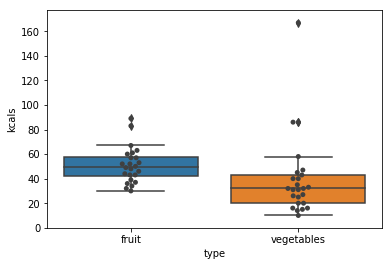

In [330]:
kcals = get_kilocals(fresh_complete)
fresh_complete["kcals"] = kcals

ax = sns.boxplot(x = "type", y = "kcals", data = fresh_complete)
ax = sns.swarmplot(x = "type", y = "kcals", data = fresh_complete, color = ".25")

In [331]:
# Split the foods into two dataframes based on group and extract kcal values
fruits = fresh_complete.loc[fresh_complete["type"] == "fruit", "kcals"]
veggies = fresh_complete.loc[fresh_complete["type"] == "vegetables", "kcals"]

# Find means of fruit and veggie kcals
print("Mean of fruit kcals:  " + str(sum(fruits)/len(fruits)))
print("Mean of veggie kcals: " + str(sum(veggies)/len(veggies)))

Mean of fruit kcals:  51.041666666666664
Mean of veggie kcals: 39.8


__Which foods are the best value for the price?__



In [335]:
value_cup = fresh_complete["kcals"] / fresh_complete["price_per_cup"]
fresh_complete["value_cup"] = value_cup

value_lb = fresh_complete["kcals"] / fresh_complete["price_per_lb"]
fresh_complete["value_lb"] = value_lb

fresh_complete

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcals,value_cup,value_lb
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,30.0,148.982404,94.745186
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181,34.0,88.838295,65.284971
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218,53.0,64.956654,35.801227
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316,32.0,37.511997,12.756884
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279,46.0,59.793139,23.138846
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201,49.0,74.463636,44.662324
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302,52.0,22.705389,7.560665
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,83.0,65.443234,39.933988
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,50.0,107.385454,76.593777
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021,48.0,39.751174,15.548383


In [360]:
best_value_cup = fresh_complete.sort_values(by = "value_cup", ascending = False).head(10)
best_value_cup

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcals,value_cup,value_lb
14,Fresh1,0.549417,0.640000,0.330693,0.283889,bananas,fruit,09040,89.0,313.503315,161.989805
31,Fresh1,0.603736,0.811301,0.264555,0.196870,potatoes,vegetables,11362,58.0,294.609962,96.068466
42,Fresh1,2.225544,0.740753,0.319670,0.960428,avocados,vegetables,09038,167.0,173.880767,75.037831
38,Fresh1,1.054409,0.811301,0.440925,0.573049,sweet_potatoes,vegetables,11507,86.0,150.074543,81.562252
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,30.0,148.982404,94.745186
15,Fresh1,1.615534,0.900000,0.242508,0.435312,apples,fruit,09003,52.0,119.454606,32.187507
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,50.0,107.385454,76.593777
28,Fresh1,1.047382,0.900000,0.352740,0.410503,onions,vegetables,11282,40.0,97.441336,38.190466
36,Fresh green cabbage1,0.623871,0.778797,0.330693,0.264909,cabbage,vegetables,11109,25.0,94.372149,40.072372
18,Fresh1,1.517592,0.900000,0.363763,0.613382,pears,fruit,09252,57.0,92.927474,37.559502


In [361]:
best_value_lb = fresh_complete.sort_values(by = "value_lb", ascending = False).head(10)
best_value_lb

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcals,value_cup,value_lb
14,Fresh1,0.549417,0.640000,0.330693,0.283889,bananas,fruit,09040,89.0,313.503315,161.989805
31,Fresh1,0.603736,0.811301,0.264555,0.196870,potatoes,vegetables,11362,58.0,294.609962,96.068466
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,30.0,148.982404,94.745186
38,Fresh1,1.054409,0.811301,0.440925,0.573049,sweet_potatoes,vegetables,11507,86.0,150.074543,81.562252
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,50.0,107.385454,76.593777
42,Fresh1,2.225544,0.740753,0.319670,0.960428,avocados,vegetables,09038,167.0,173.880767,75.037831
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181,34.0,88.838295,65.284971
23,Fresh1,1.323517,0.710000,0.363763,0.678093,mangoes,fruit,09176,60.0,88.483394,45.333748
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201,49.0,74.463636,44.662324
10,Fresh1,0.825991,0.460000,0.374786,0.672978,honeydew,fruit,09184,36.0,53.493587,43.583999


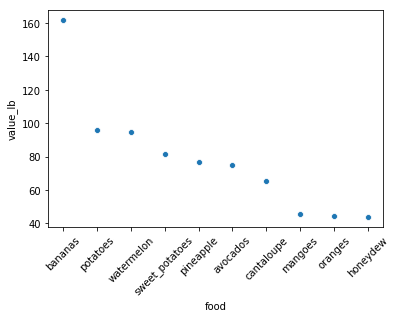

In [357]:
ticks = plt.xticks(rotation = 45)
ax = sns.scatterplot(x = "food", y = "value_lb", data = best_value_lb.head(10))

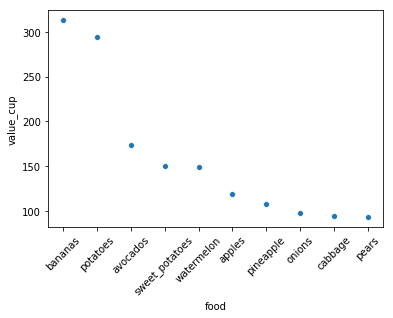

In [359]:
ticks = plt.xticks(rotation = 45)
ax = sns.scatterplot(x = "food", y = "value_cup", data = best_value_cup.head(10))